<a href="https://colab.research.google.com/github/Nithyarajoman/Machine-learning-Trial/blob/main/Finding%20intermediate%20result%20for%20a%20trained%20network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Read data
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float')/255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float')/255

In [ ]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'training samples')
print(x_test.shape[0], 'testing samples')

x_train shape: (60000, 28, 28, 1)
60000 training samples
10000 testing samples


In [ ]:
# Create Model
model = keras.models.Sequential(
    [       
        layers.Conv2D(32, kernel_size=(3, 3),
                      input_shape=(28, 28, 1),
                      strides=(2,2), padding="same",
                      use_bias=False),
        layers.BatchNormalization(),
        layers.Activation(activation="relu"),
        #layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3),
                      strides=(2,2), padding="same",
                      use_bias=False),
        layers.BatchNormalization(),
        layers.Activation(activation="relu"),
        #layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ]
)

In [ ]:
model.summary()
for i,layer in enumerate(model.layers):
  print(f"Weight of layer {i} ({layer.name}): {layer.get_weights()}\n")
  

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        320       
                                                                 
 batch_normalization_4 (Batc  (None, 14, 14, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 14, 14, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)          18432     
                                                                 
 batch_normalization_5 (Batc  (None, 7, 7, 64)         256       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 7, 7, 64)         

In [ ]:
# Train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=15, batch_size=128, validation_split=0.1 )
score = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/15
422/422 [==============================] - 20s 46ms/step - loss: 0.5429 - accuracy: 0.8088 - val_loss: 0.7271 - val_accuracy: 0.7527
Epoch 2/15
422/422 [==============================] - 20s 46ms/step - loss: 0.3820 - accuracy: 0.8636 - val_loss: 0.3380 - val_accuracy: 0.8760
Epoch 3/15
422/422 [==============================] - 20s 46ms/step - loss: 0.3372 - accuracy: 0.8779 - val_loss: 0.3048 - val_accuracy: 0.8868
Epoch 4/15
422/422 [==============================] - 20s 46ms/step - loss: 0.3085 - accuracy: 0.8890 - val_loss: 0.2888 - val_accuracy: 0.8925
Epoch 5/15
422/422 [==============================] - 20s 47ms/step - loss: 0.2927 - accuracy: 0.8944 - val_loss: 0.3476 - val_accuracy: 0.8650
Epoch 6/15
422/422 [==============================] - 20s 46ms/step - loss: 0.2796 - accuracy: 0.8981 - val_loss: 0.2704 - val_accuracy: 0.9022
Epoch 7/15
422/422 [==============================] - 20s 46ms/step - loss: 0.2682 - accuracy: 0.9021 - val_loss: 0.2672 - val_accuracy:

In [ ]:
# build a new model with outputs the output of BN
all_layers = [layer.output for layer in [model.get_layer(index=0),
                                        model.get_layer(index=1),
                                        model.get_layer(index=2),
                                        model.get_layer(index=3),
                                        model.get_layer(index=4),
                                        model.get_layer(index=5)]]

In [ ]:
print(all_layers)

[<KerasTensor: shape=(None, 14, 14, 32) dtype=float32 (created by layer 'conv2d_4')>, <KerasTensor: shape=(None, 14, 14, 32) dtype=float32 (created by layer 'batch_normalization_4')>, <KerasTensor: shape=(None, 14, 14, 32) dtype=float32 (created by layer 'activation_4')>, <KerasTensor: shape=(None, 7, 7, 64) dtype=float32 (created by layer 'conv2d_5')>, <KerasTensor: shape=(None, 7, 7, 64) dtype=float32 (created by layer 'batch_normalization_5')>, <KerasTensor: shape=(None, 7, 7, 64) dtype=float32 (created by layer 'activation_5')>]


In [ ]:
# Creating model
all_model = tf.keras.Model(inputs=model.inputs, outputs=all_layers)

In [ ]:
all_model.summary()
for i,layer in enumerate(model.layers):
  print(f"Weight of layer {i} ({layer.name}): {layer.get_weights()}\n")

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4_input (InputLayer)  [(None, 28, 28, 1)]      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        320       
                                                                 
 batch_normalization_4 (Batc  (None, 14, 14, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 14, 14, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)          18432     
                                                                 
 batch_normalization_5 (Batc  (None, 7, 7, 64)         256       
 hNormalization)                                             

In [ ]:
aux = all_model(x_train[:100])

In [ ]:
#creating the model to predict
predict_layer_1 = tf.keras.Model(inputs=model.input, outputs = all_model.layers[1].output)
single_1 = x_train[:100]
predict_result_1 = predict_layer_1.predict(single_1)
print(predict_result_1.shape)
print(predict_result_1)

(100, 14, 14, 32)
[[[[-0.06723783  0.07693806  0.07553312 ...  0.00502894  0.08652025
     0.03037803]
   [-0.06723783  0.07693806  0.07553312 ...  0.00502894  0.08652025
     0.03037803]
   [-0.06723783  0.07693806  0.07553312 ...  0.00502894  0.08652025
     0.03037803]
   ...
   [-0.06723783  0.07693806  0.07553312 ...  0.00502894  0.08652025
     0.03037803]
   [-0.06723783  0.07693806  0.07553312 ...  0.00502894  0.08652025
     0.03037803]
   [-0.06723783  0.07693806  0.07553312 ...  0.00502894  0.08652025
     0.03037803]]

  [[-0.06723783  0.07693806  0.07553312 ...  0.00502894  0.08652025
     0.03037803]
   [-0.06723783  0.07693806  0.07553312 ...  0.00502894  0.08652025
     0.03037803]
   [-0.06723783  0.07693806  0.07553312 ...  0.00502894  0.08652025
     0.03037803]
   ...
   [-0.06917436  0.07727607  0.07559706 ...  0.00478039  0.08447344
     0.02964532]
   [-0.06734475  0.07785989  0.07654606 ...  0.00691551  0.0831444
     0.03287546]
   [-0.06839141  0.07573098  0.0

In [ ]:
print(x_train)

In [ ]:
print(aux)

In [ ]:
import matplotlib.pyplot as plt

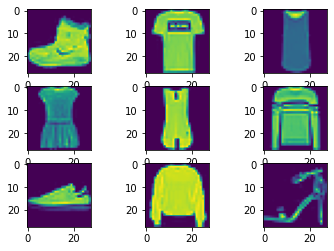

In [ ]:
# input
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(np.squeeze(single_1[i]))
    # plt.axis('off')


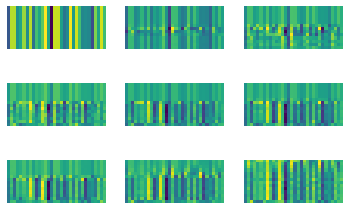

In [ ]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(np.squeeze(predict_result_1[0][i]))
    plt.axis('off')